Setting up and doing imports.

In [8]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [9]:
from fastai.vision import *
from fastai.metrics import error_rate
from os import path

In [10]:
bs = 64

Creating folders and downloading files for each category.

In [11]:
catlist = ['ballsports','celebrities','esports','felines','light','martialarts','music','nature','water','wrestling']

In [12]:
for cat in catlist:
    folder = cat
    file = cat + '.csv'
    path = Path('data/categories')
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)
    download_images(path/file, dest, max_pics=500)

In [13]:
path.ls()

[PosixPath('data/categories/light'),
 PosixPath('data/categories/nature.csv'),
 PosixPath('data/categories/light.csv'),
 PosixPath('data/categories/music.csv'),
 PosixPath('data/categories/esports.csv'),
 PosixPath('data/categories/martialarts'),
 PosixPath('data/categories/wrestling'),
 PosixPath('data/categories/wrestling.csv'),
 PosixPath('data/categories/nature'),
 PosixPath('data/categories/celebrities.csv'),
 PosixPath('data/categories/.ipynb_checkpoints'),
 PosixPath('data/categories/water'),
 PosixPath('data/categories/martialarts.csv'),
 PosixPath('data/categories/felines.csv'),
 PosixPath('data/categories/water.csv'),
 PosixPath('data/categories/ballsports'),
 PosixPath('data/categories/esports'),
 PosixPath('data/categories/ballsports.csv'),
 PosixPath('data/categories/felines'),
 PosixPath('data/categories/music'),
 PosixPath('data/categories/celebrities')]

In [14]:
classes = catlist

In [15]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

ballsports


celebrities


esports


felines


light


martialarts


music


nature


water


wrestling


In [16]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [17]:
data.classes

['ballsports',
 'celebrities',
 'esports',
 'felines',
 'light',
 'martialarts',
 'music',
 'nature',
 'water',
 'wrestling']

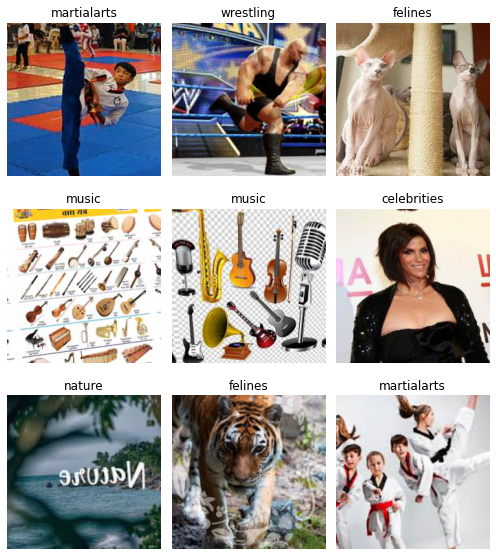

In [18]:
data.show_batch(rows=3, figsize=(7,8))

In [19]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['ballsports',
  'celebrities',
  'esports',
  'felines',
  'light',
  'martialarts',
  'music',
  'nature',
  'water',
  'wrestling'],
 10,
 800,
 200)

In [33]:
print((type(data.train_ds)))


SyntaxError: can't assign to function call (<ipython-input-33-8ab7c297d0d6>, line 2)

In [20]:
easy_model = cnn_learner(data, models.resnet34, metrics=error_rate)
easy_model.fit_one_cycle(3)
easy_model.save('easy')

epoch,train_loss,valid_loss,error_rate,time
0,2.373346,0.625635,0.160000,00:04
1,1.299321,0.433821,0.120000,00:03
2,0.867210,0.421201,0.120000,00:03


In [21]:
medium_model = cnn_learner(data, models.resnet34, metrics=error_rate)
medium_model.fit_one_cycle(6)
medium_model.save('medium')

epoch,train_loss,valid_loss,error_rate,time
0,2.498436,0.730345,0.190000,00:03
1,1.453190,0.441298,0.125000,00:03
2,0.963455,0.391697,0.120000,00:03
3,0.695717,0.388389,0.110000,00:03
4,0.532154,0.371732,0.105000,00:03
5,0.426019,0.365582,0.120000,00:03


In [22]:
hard_model = cnn_learner(data, models.resnet34, metrics=error_rate)
hard_model.fit_one_cycle(9)
hard_model.save('medium')

epoch,train_loss,valid_loss,error_rate,time
0,2.949494,1.238587,0.365000,00:03
1,1.838046,0.519740,0.165000,00:03
2,1.211613,0.481132,0.155000,00:03
3,0.865472,0.469414,0.130000,00:03
4,0.659008,0.460944,0.135000,00:03
5,0.510144,0.436738,0.135000,00:03
6,0.412297,0.422505,0.140000,00:03
7,0.336629,0.420898,0.145000,00:03
8,0.283115,0.427289,0.145000,00:03
